**Алгоритм получения случайного значения с треугольным распределением вероятностей**

In [1]:
import numpy as np


def line_one(triangle_params: tuple[float, float, float], x: float) -> float:
    a, b, c = triangle_params
    return abs((2 * (x - a)) / ((a * a) - a * (b + c) + b * c))


def line_two(triangle_params: tuple[float, float, float], x: float) -> float:
    a, b, c = triangle_params
    return abs((2 * (x - b)) / (- (b * b) + a * (b - c) + b * c))


def inside_triangle(x: float, y: float, triangle_params: tuple[float, float, float]) -> bool:
    inside: bool
    c = triangle_params[2]
    if x < c:
        inside = y < line_one(triangle_params, x)
    else:
        inside = y < line_two(triangle_params, x)
    
    return inside


def random_triangle(
        a: float, 
        b: float, 
        c: float, 
        test_mode: bool = False
):
    number_of_tries: int = 1
    if a > b or c > b or c < a:
        raise ValueError("Incorrect triangle parameters")

    triangle_params: tuple[float, float, float] = (a, b, c)

    height: float = 2 / (b - a)

    x: float = np.random.uniform(a, b)
    y: float = np.random.uniform(0, height)

    while not inside_triangle(x, y, triangle_params):
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, height)
        number_of_tries += 1
    
    if test_mode:
        return x, number_of_tries
    else:
        return x

**Функция построения гистограммы**

In [2]:
import matplotlib.pyplot as plt

def plot_histogram(
        data, 
        bins: int, 
        x_label: str = 'Value', 
        y_label: str = 'Frequency', 
        title: str = 'Histogram of values'
) -> None:
    plt.hist(data, bins=bins, align='left', rwidth=0.8)
    plt.xlabel(xlabel=x_label)
    plt.ylabel(ylabel=y_label)
    plt.title(label=title)
    plt.show()

**Исследование эффективности алгоритма на "удобных" значениях (то есть точки a, b, c расположены далеко друг от друга образуя треугольник близкий к равнобедренному)**

2.0006979
24
1
Max tries count: 2
Min tries count: 4997870
90 % tries was less than: 4.0


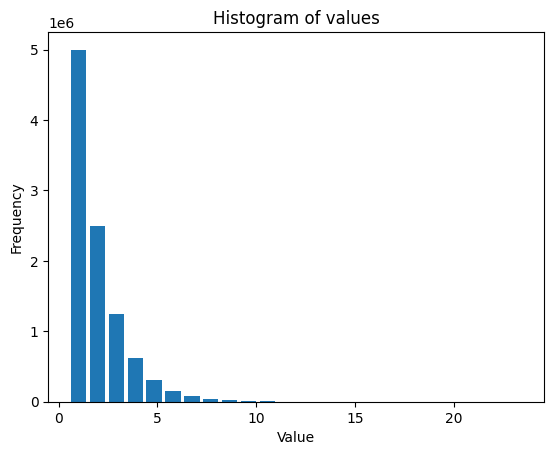

In [19]:
tries: list[int] = []
for _ in range(10000000):
    tries.append(random_triangle(2, 8, 4, test_mode=True)[1])

print(np.mean(tries))
print(np.max(tries))
print(np.min(tries))
print(f"Max tries count: {tries.count(np.max(tries))}")
print(f"Min tries count: {tries.count(np.min(tries))}")
print(f"90 % tries was less than: {np.quantile(tries, 0.9)}")

plot_histogram(tries, np.max(tries))

**Исследование эффективности алгоритма на близких друг к другу точках a и b (|a - b| = 0.3)**

1.9999292
24
1
Max tries count: 1
Min tries count: 5001703
90 % tries was less than: 4.0


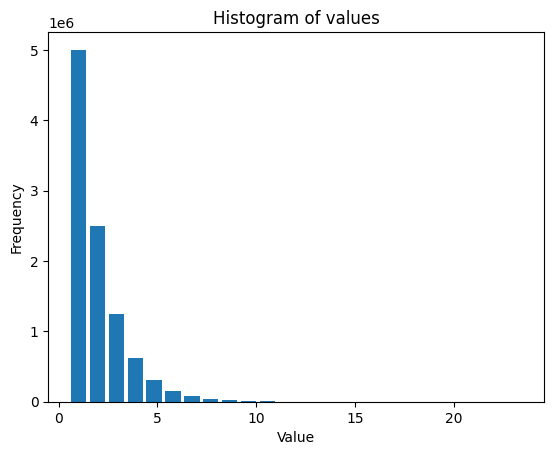

In [17]:
tries: list[int] = []
for _ in range(10000000):
    tries.append(random_triangle(2, 2.3, 2.2, test_mode=True)[1])

print(np.mean(tries))
print(np.max(tries))
print(np.min(tries))
print(f"Max tries count: {tries.count(np.max(tries))}")
print(f"Min tries count: {tries.count(np.min(tries))}")
print(f"90 % tries was less than: {np.quantile(tries, 0.9)}")

plot_histogram(tries, np.max(tries))

**Исследование эффективности алгоритма на очень близких друг к другу точках a и b (|a - b| = 0.0001)**

2.0001503
27
1
Max tries count: 1
Min tries count: 4998678
90 % tries was less than: 4.0


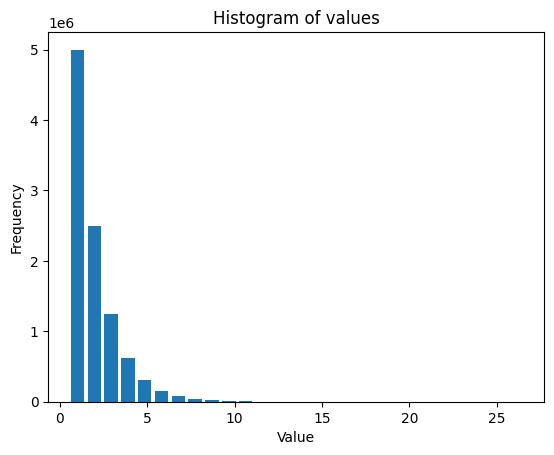

In [18]:
tries: list[int] = []
for _ in range(10000000):
    tries.append(random_triangle(2, 2.0001, 2.000001, test_mode=True)[1])

print(np.mean(tries))
print(np.max(tries))
print(np.min(tries))
print(f"Max tries count: {tries.count(np.max(tries))}")
print(f"Min tries count: {tries.count(np.min(tries))}")
print(f"90 % tries was less than: {np.quantile(tries, 0.9)}")

plot_histogram(tries, np.max(tries))

**Исследование эффективности алгоритма на очень далёких друг от друга точках a и b (|a - b| = 100), причем они вместе с точкой c образуют треугольник с очень маленькой высотой к оси x**

1.9997045
23
1
Max tries count: 2
Min tries count: 4998709
90 % tries was less than: 4.0


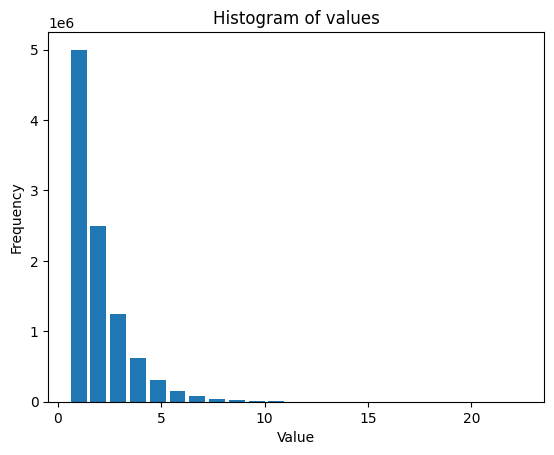

In [20]:
tries: list[int] = []
for _ in range(10000000):
    tries.append(random_triangle(2, 102, 2.1, test_mode=True)[1])

print(np.mean(tries))
print(np.max(tries))
print(np.min(tries))
print(f"Max tries count: {tries.count(np.max(tries))}")
print(f"Min tries count: {tries.count(np.min(tries))}")
print(f"90 % tries was less than: {np.quantile(tries, 0.9)}")

plot_histogram(tries, np.max(tries))

In [4]:
randoms: list[float] = []
for _ in range(10000000):
    randoms.append(random_triangle(2, 8, 4))

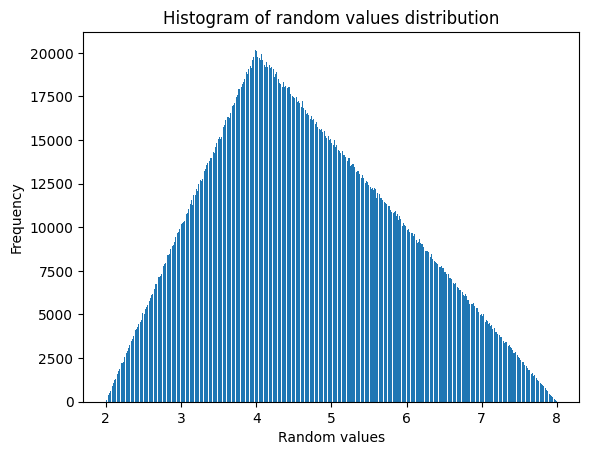

In [5]:
plot_histogram(
    randoms, 
    bins=1000, 
    x_label='Random values', 
    y_label='Frequency', 
    title='Histogram of random values distribution'
)

In [13]:
randoms: list[float] = []
for _ in range(10000000):
    randoms.append(random_triangle(0, 10, 8))

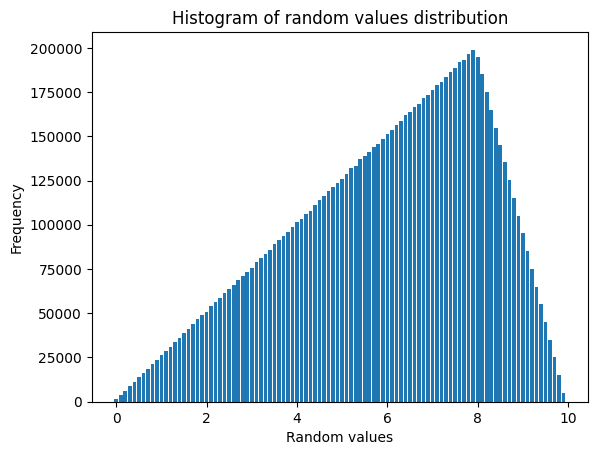

In [14]:
plot_histogram(
    randoms, 
    bins=100, 
    x_label='Random values', 
    y_label='Frequency', 
    title='Histogram of random values distribution'
)

In [15]:
randoms: list[float] = []
for _ in range(10000000):
    randoms.append(random_triangle(0, 1, 0.68953678))

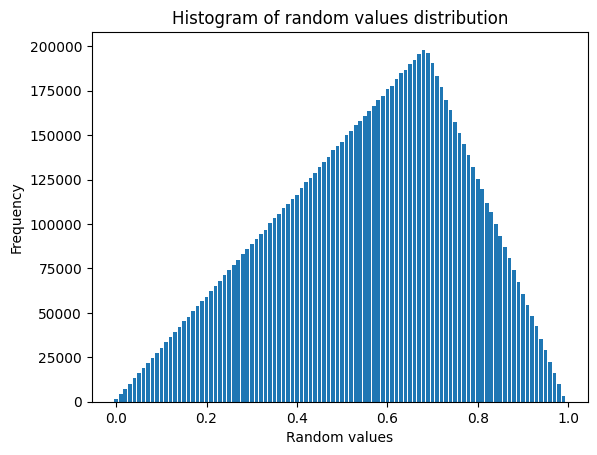

In [16]:
plot_histogram(
    randoms, 
    bins=100, 
    x_label='Random values', 
    y_label='Frequency', 
    title='Histogram of random values distribution'
)